In [1]:
#Dataframes imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np


In [2]:
#Visualisation Libs
import matplotlib as mlb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [18]:
#For getting data from Yahoo Finance or Google Finance
from pandas_datareader.data import DataReader
from datetime import datetime

In [11]:
#Import for floating number
from __future__ import division

In [12]:
#Setting a list for tickers to be analyzed
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#Setting date and time
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)


In [20]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [21]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,104.867341,105.803849,103.962698,104.902460,4.065093e+07,103.857841
std,8.129568,8.152080,8.108095,8.134879,1.736039e+07,7.895333
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,97.295000,98.205000,96.542502,97.137499,2.897135e+07,96.300820
50%,105.494999,106.279999,104.849998,105.735001,3.583265e+07,104.647514
75%,111.125000,112.285000,110.150000,111.632499,4.658642e+07,109.489600
max,123.129997,123.820000,121.620003,122.570000,1.333697e+08,120.004194


In [22]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-10-09 to 2016-10-07
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


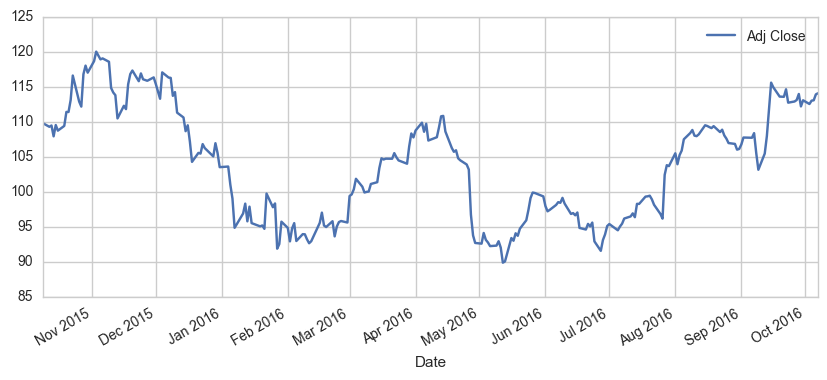

In [23]:
AAPL['Adj Close'].plot(legend = True,figsize=(10,4))

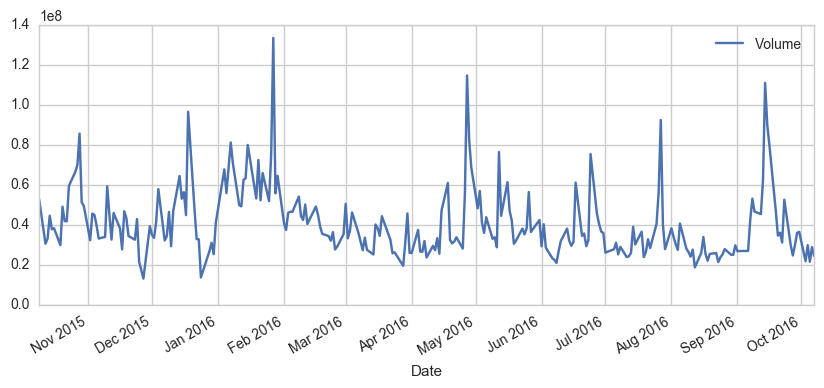

In [24]:
AAPL['Volume'].plot(legend = True,figsize=(10,4))

In [25]:
ma_day =[10,20,50]

for ma in ma_day:
    column_name="MA for %s days"%(str(ma))
    
    AAPL[column_name]= pd.rolling_mean(AAPL['Adj Close'],ma)

C:\Users\yash1\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
C:\Users\yash1\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
C:\Users\yash1\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


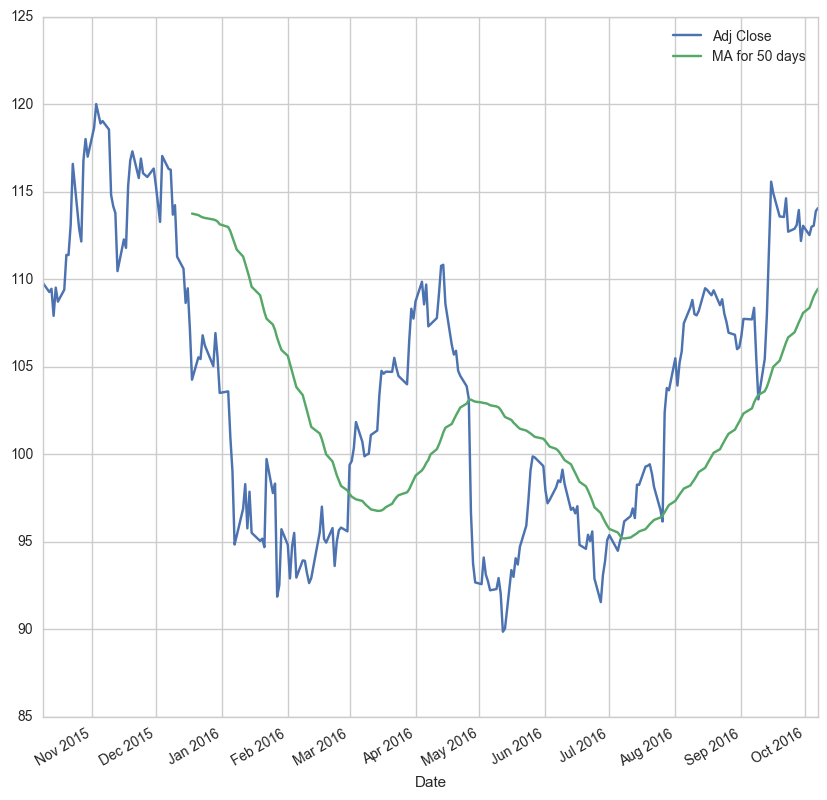

In [26]:
AAPL[['Adj Close','MA for 50 days']].plot(figsize=(10,10))

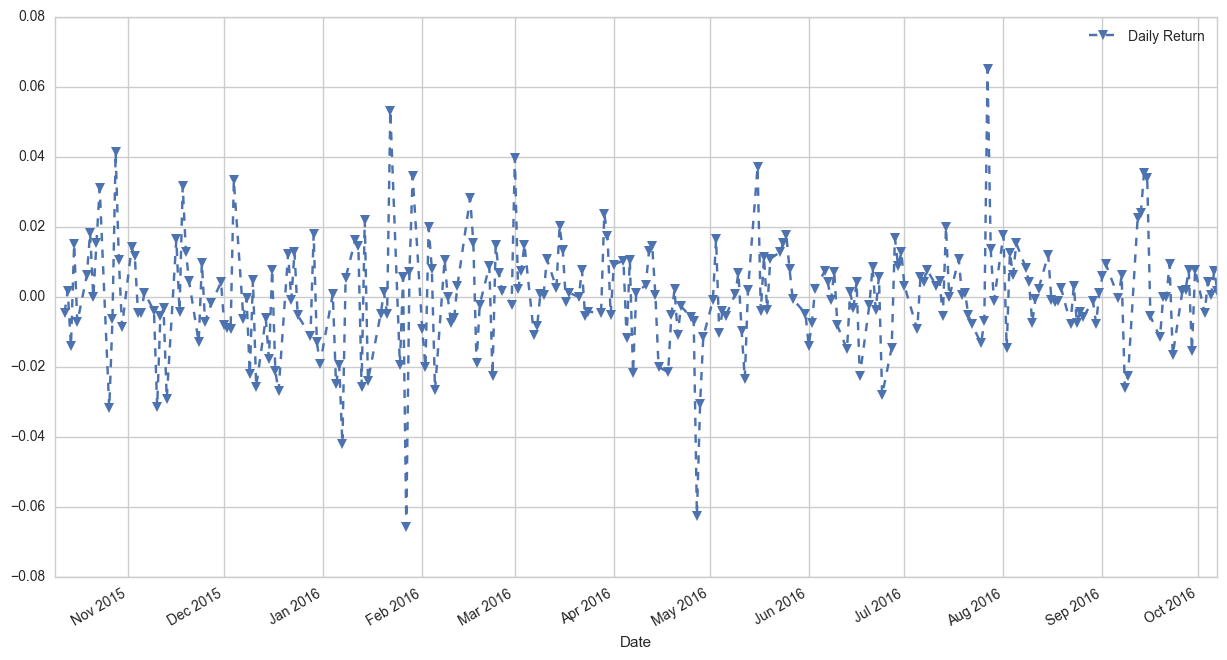

In [27]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(legend=True,figsize=(15,8),ls='--',marker = 'v')

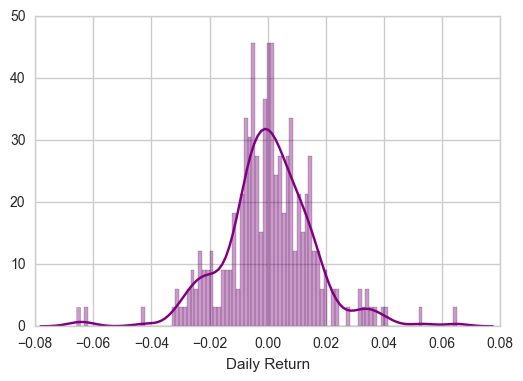

In [28]:
sns.distplot(AAPL['Daily Return'].dropna(),color='purple',bins=100)

In [29]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close'].dropna()

In [30]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-10-09,109.772951,539.799988,643.609985,45.852514
2015-10-12,109.263832,550.190002,646.669983,45.745449
2015-10-13,109.449857,548.900024,652.299988,45.638385
2015-10-14,107.902930,544.830017,651.159973,45.433991
2015-10-15,109.518392,562.440002,661.739990,45.755181


In [31]:
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-10-09,NaN,NaN,NaN,NaN
2015-10-12,-0.004638,0.019248,0.004754,-0.002335
2015-10-13,0.001703,-0.002345,0.008706,-0.002340
2015-10-14,-0.014134,-0.007415,-0.001748,-0.004479
2015-10-15,0.014971,0.032322,0.016248,0.007069


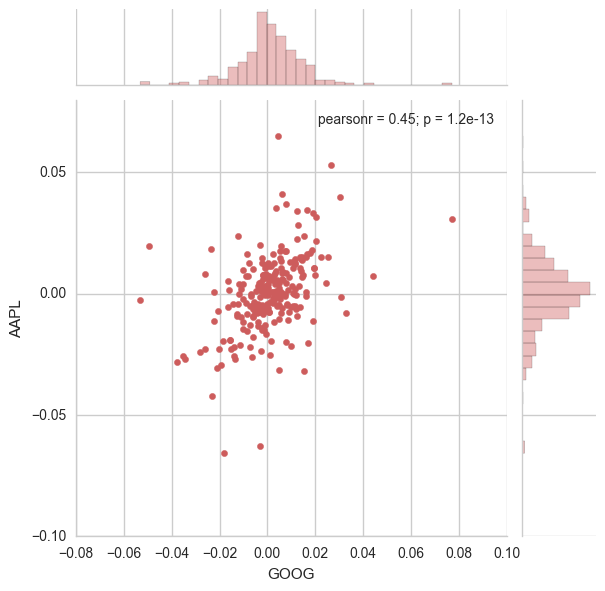

In [32]:
sns.jointplot('GOOG','AAPL',tech_rets,color='indianred',kind='scatter')

#Seaborn has pairplot for combinations
sns.pairplot(tech_rets.dropna(),size = 2.5,aspect = 1)

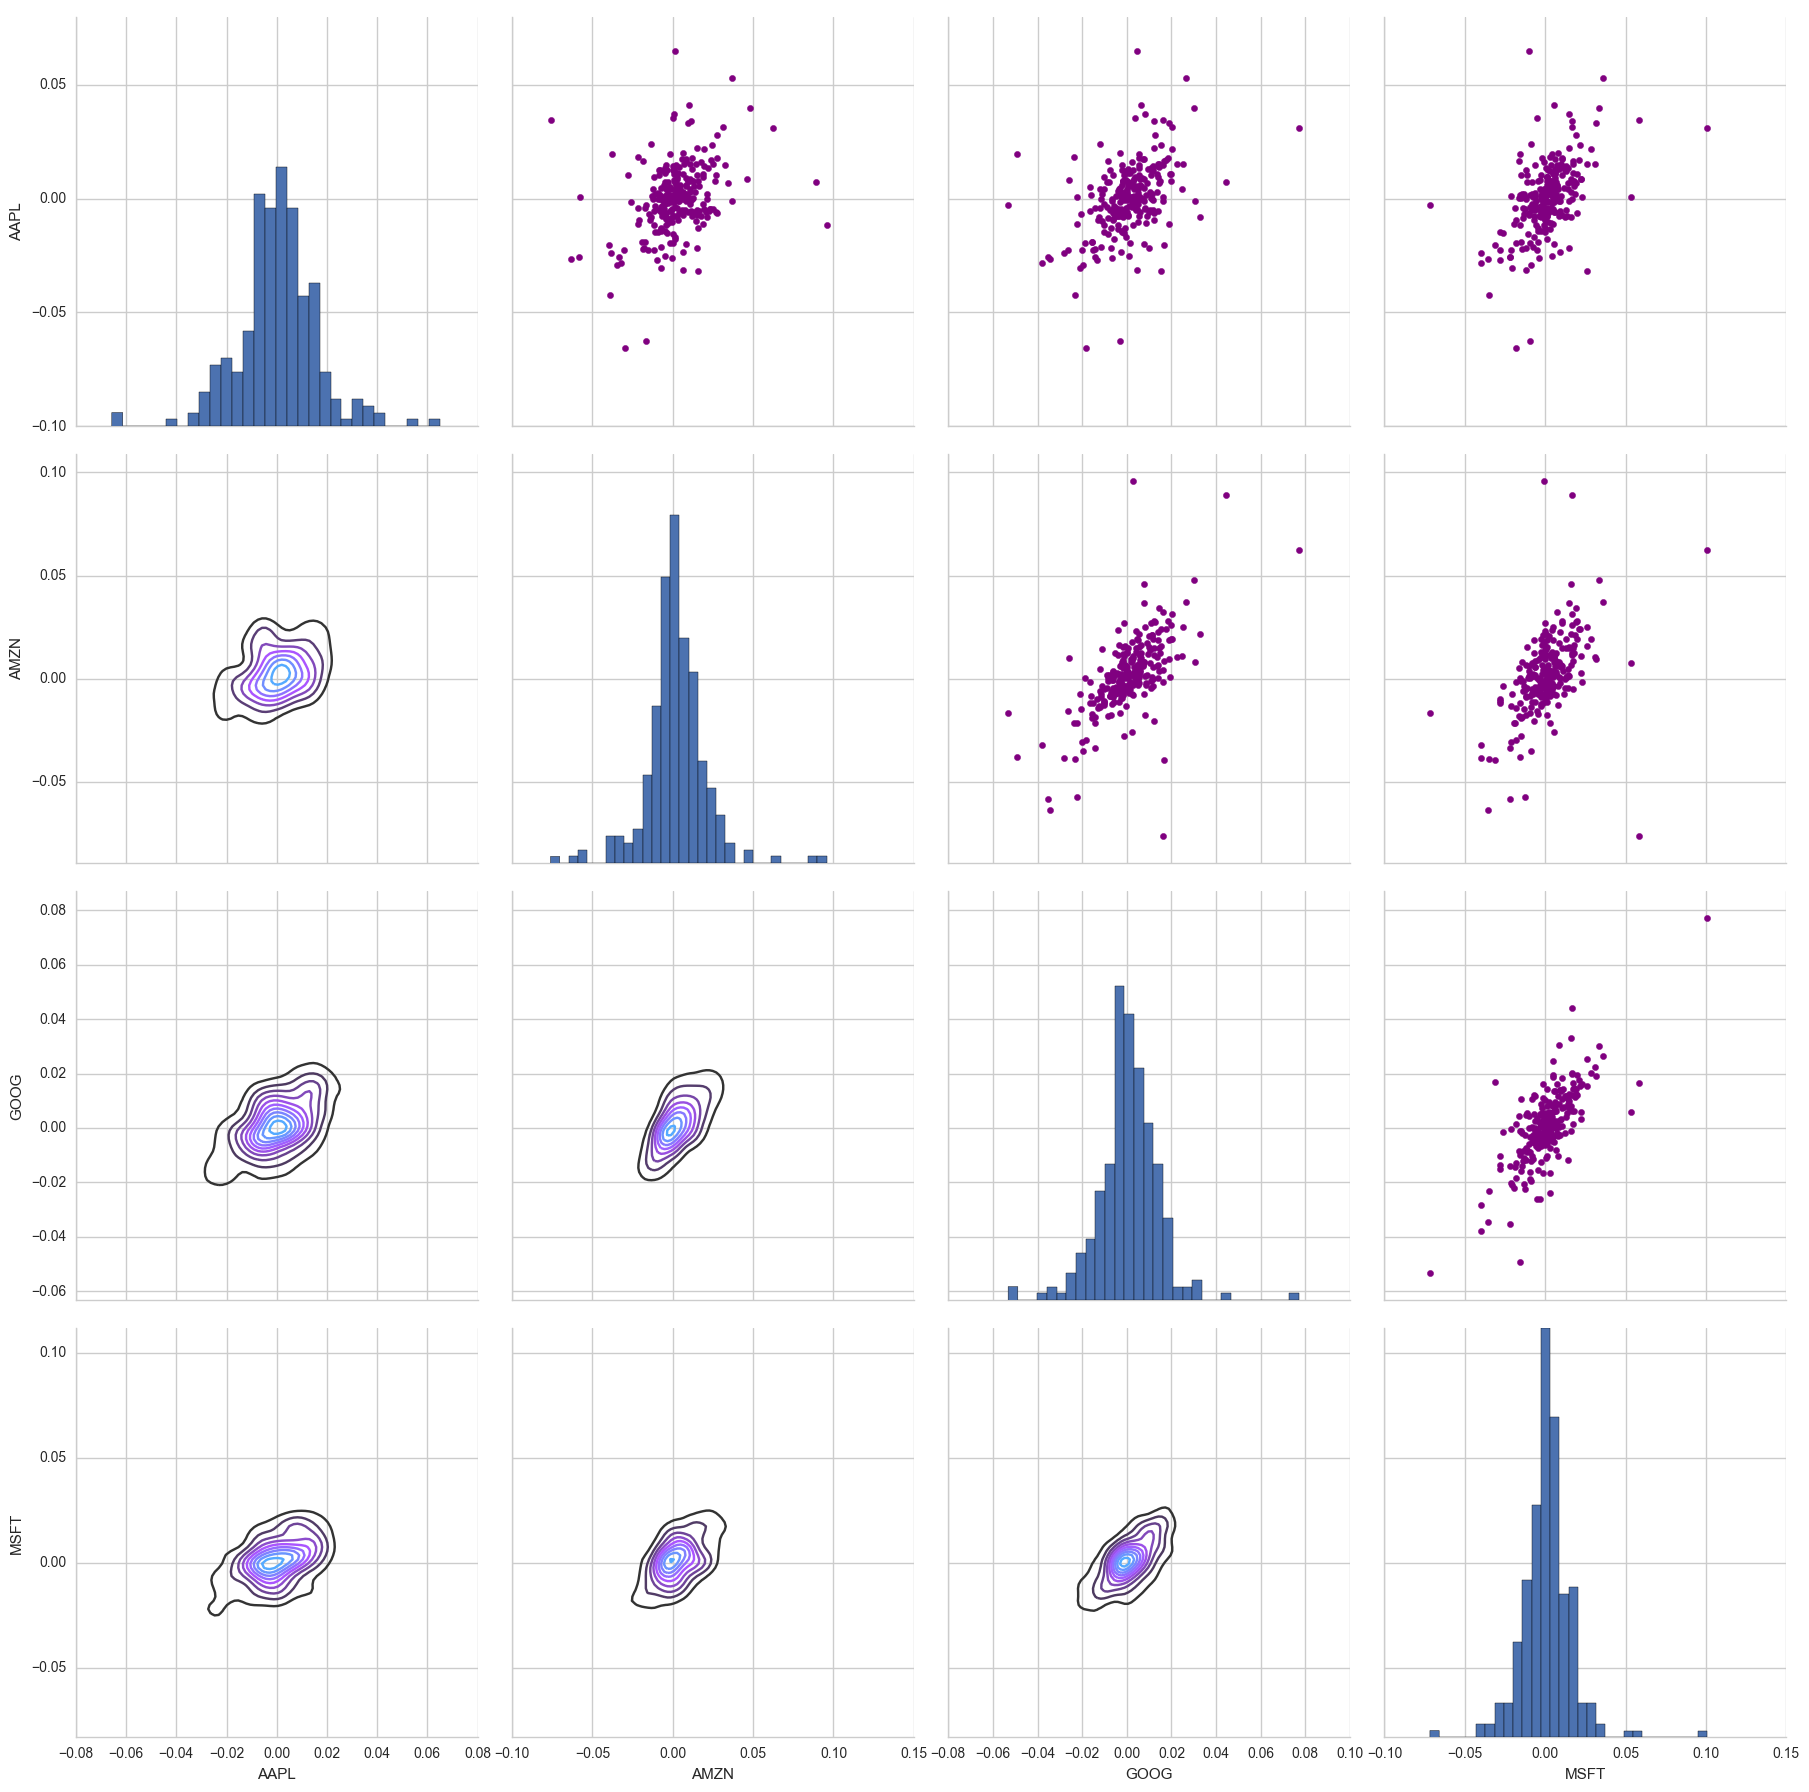

In [33]:
returns_fig = sns.PairGrid(tech_rets.dropna(),size=4.5,aspect=1)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

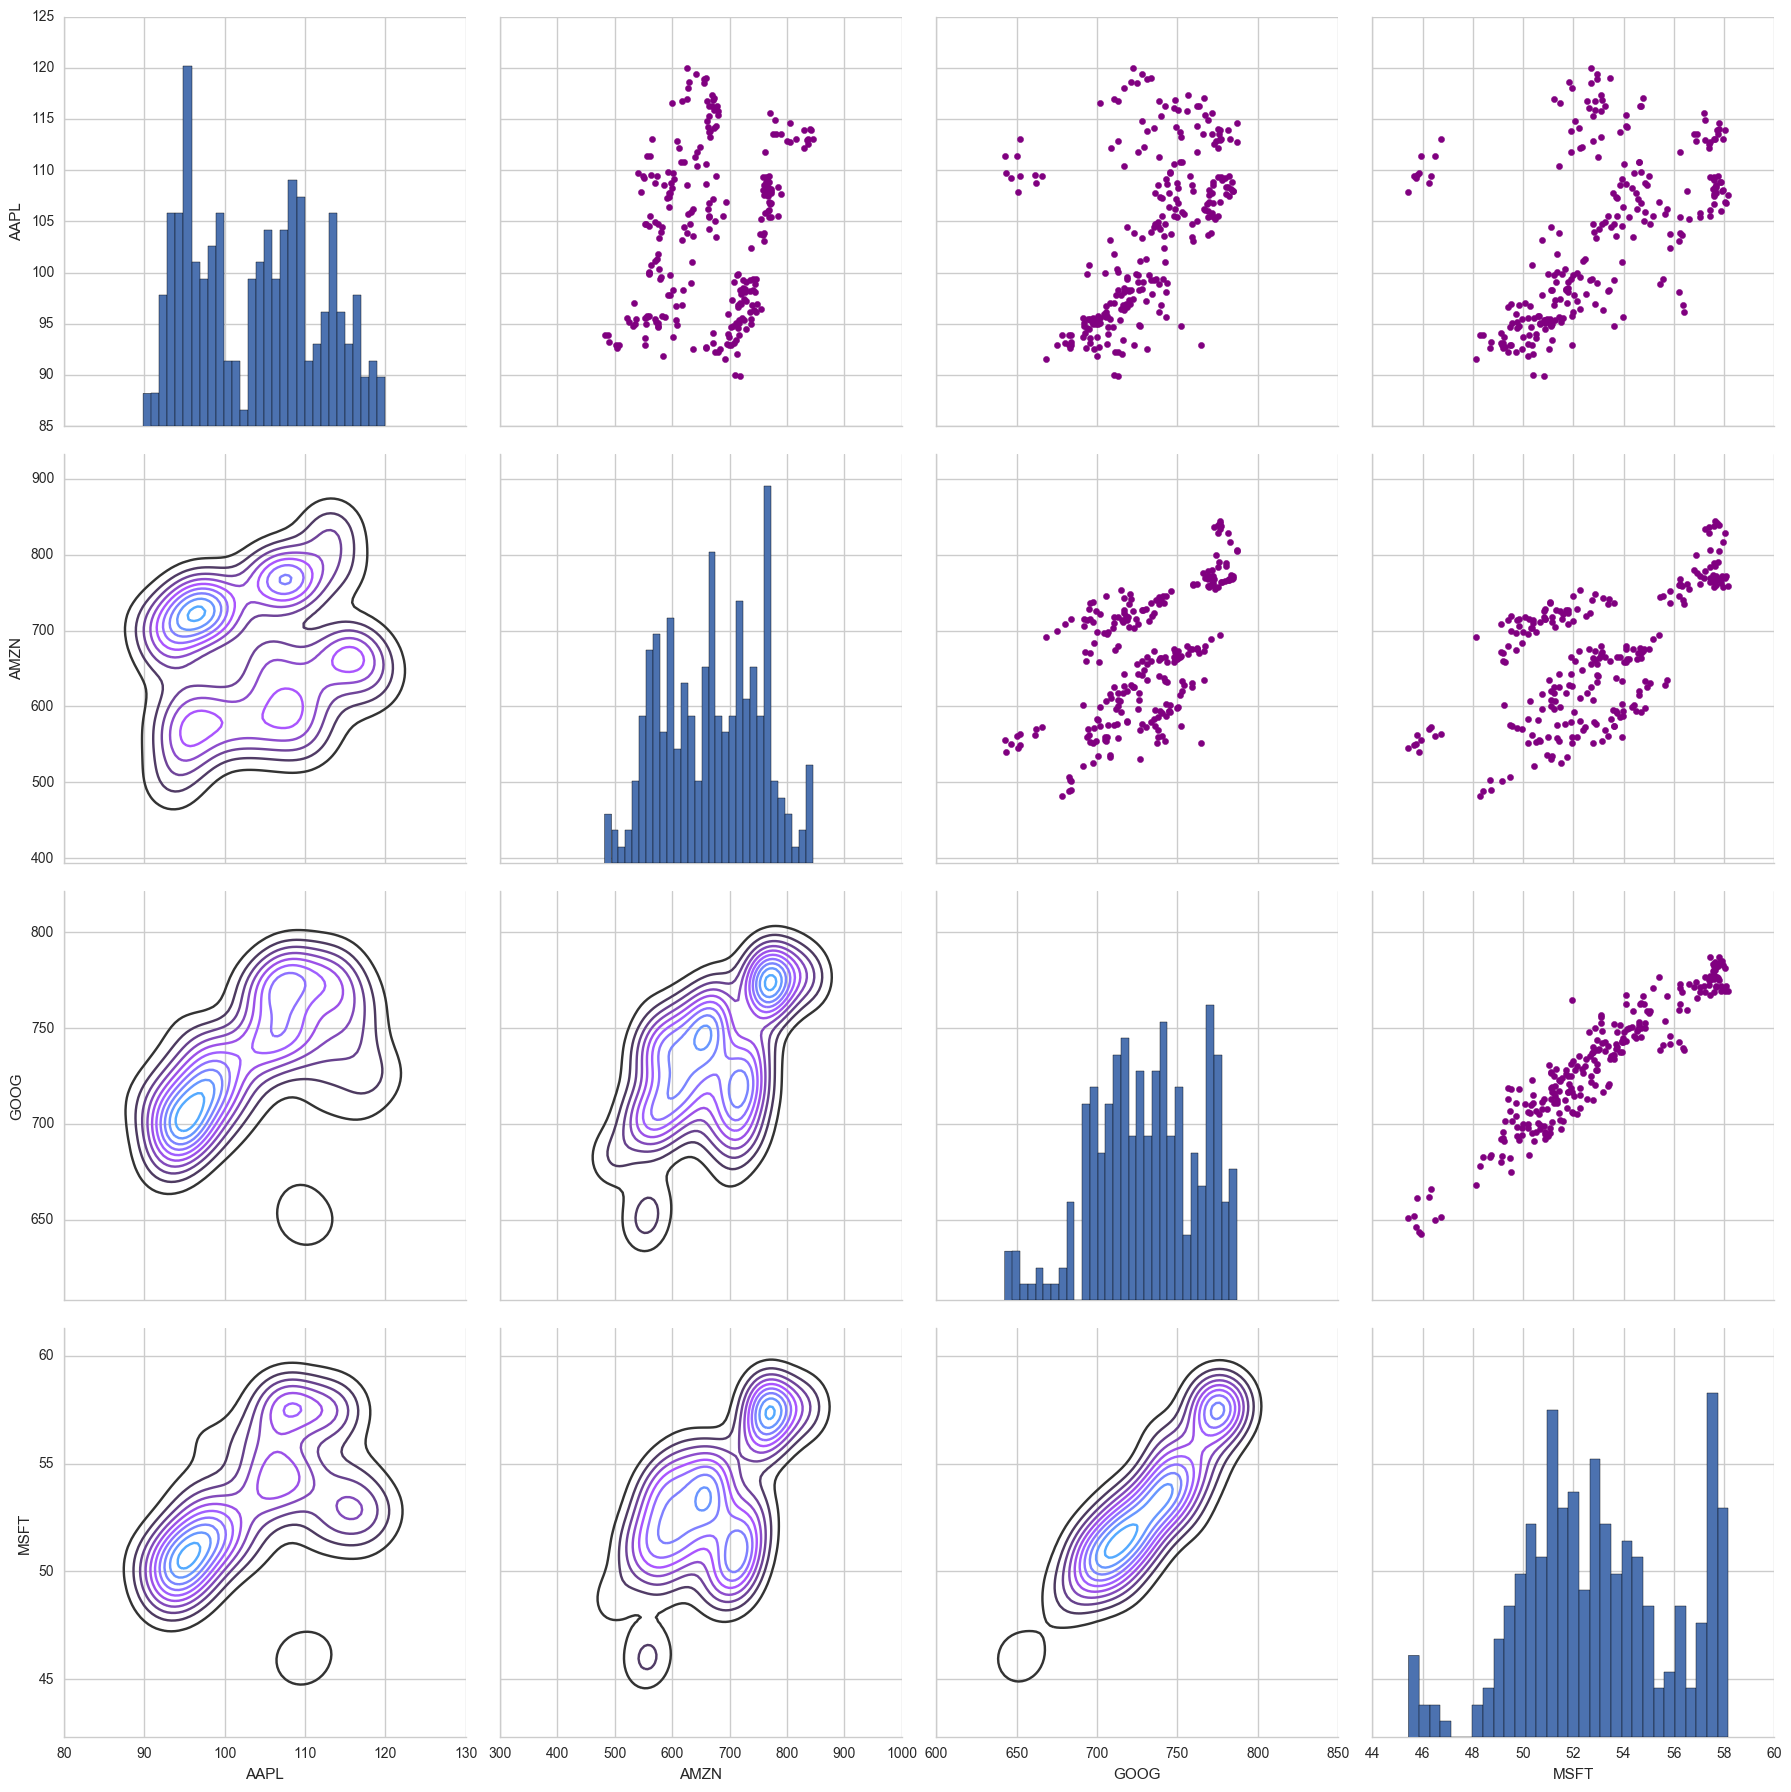

In [34]:
returns_fig = sns.PairGrid(closing_df.dropna(),size=4.5,aspect=1)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

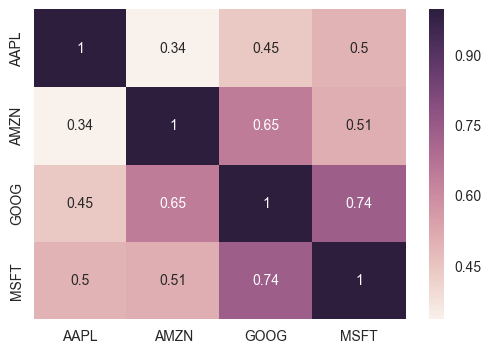

In [35]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

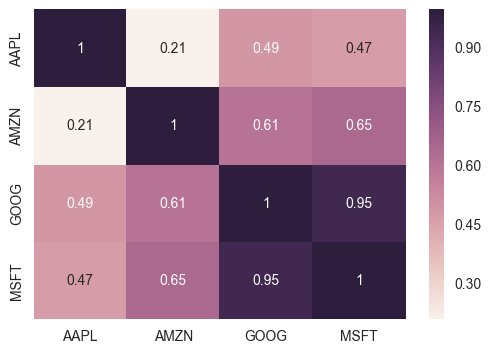

In [36]:
sns.heatmap(closing_df.dropna().corr(),annot=True)

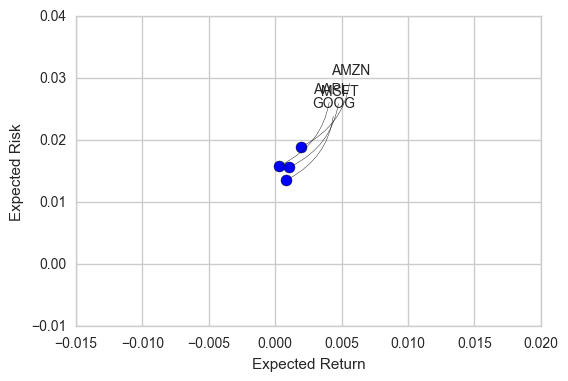

In [37]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Expected Risk')

#Putting annotation
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


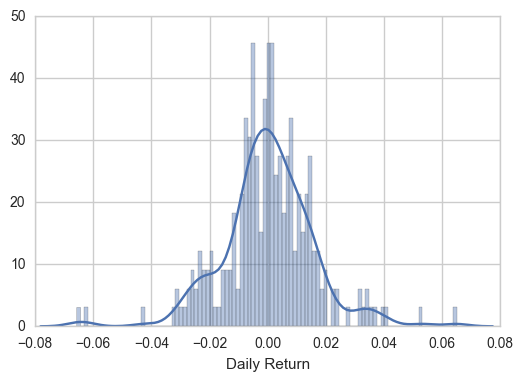

In [38]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

In [39]:
rets['AAPL'].quantile(0.05)

-0.02538480660671788

In [40]:
rets['GOOG'].quantile(0.05)

-0.020876346781046107

In [41]:
rets['AMZN'].quantile(0.05)

-0.02885615943999148

In [42]:
rets['MSFT'].quantile(0.05)

-0.021324144343355556

In [43]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']



In [44]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for i in xrange(1,days):
        
        drift[i] = mu * dt
        shock[i] = np.random.normal(loc=mu*dt,scale= sigma*np.sqrt(dt))
        
        price[i] = price[i-1] + (price[i-1]*(drift[i]+shock[i]))
        
    return price
        

In [45]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-10-09,640.000000,645.989990,635.317993,643.609985,1648700,643.609985
2015-10-12,642.090027,648.500000,639.010010,646.669983,1275200,646.669983
2015-10-13,643.150024,657.812012,643.150024,652.299988,1807700,652.299988
2015-10-14,653.210022,659.390015,648.849976,651.159973,1415500,651.159973
2015-10-15,654.659973,663.130005,654.460022,661.739990,1885700,661.739990


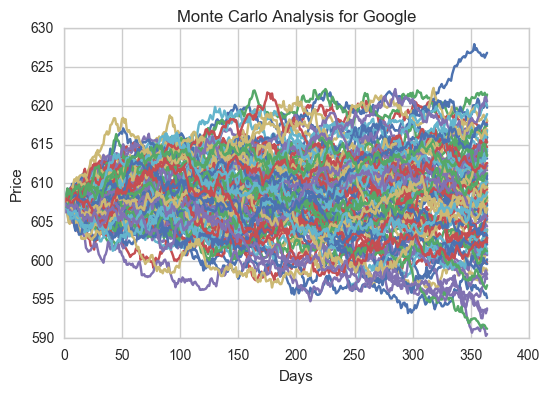

In [46]:
start_price = 607.20

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [47]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

In [48]:
q = np.percentile(simulations,1)

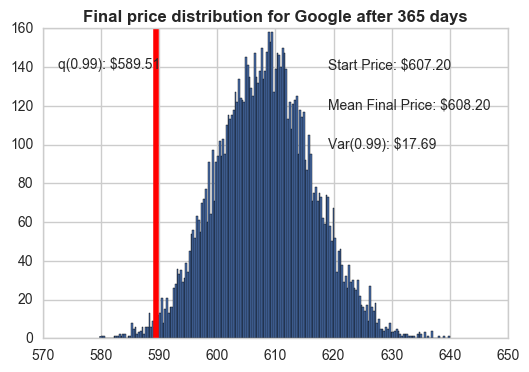

In [49]:
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8, s="Start Price: $%2.2f"%start_price)

plt.figtext(0.6,0.7, "Mean Final Price: $%2.2f"%simulations.mean())

plt.figtext(0.6,0.6, "Var(0.99): $%2.2f"%(start_price - q,))

plt.figtext(0.15,0.8,"q(0.99): $%2.2f"% q)

plt.axvline(x=q, linewidth=4,color='r')

plt.title("Final price distribution for Google after %s days"%days,weight = 'bold');